# 구대웅

In [18]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver

In [19]:
driver=webdriver.Chrome("../driver/chromedriver.exe")
driver.get('https://www.seoul.go.kr/coronaV/coronaStatus.do')

In [27]:
pd.read_html(str(keywords))[0]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1401,13329,7.09.,대전시,키르기스스탄,해외 접촉 추정,타시도 이관
1,1400,13325,7.09.,강동구,-,타시도 확진자 접촉,서납병원
2,1399,13309,7.09.,성북구,-,강남구 사무실 관련,서울의료원
3,1398,13307,7.09.,성북구,-,타시도 확진자 접촉,서울의료원
4,1397,13316,7.09.,강남구,-,확인 중,서울의료원
...,...,...,...,...,...,...,...
95,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원
96,1305,12754,6.28.,남양주,-,확인 중,서울의료원(퇴원)
97,1304,12748,6.28.,관악구,-,관악구 일가족 관련,보라매병원
98,1303,12746,6.28.,서초구,미국,해외 접촉 추정,서북병원


In [34]:
list_1=[]
for i in range(15):
    res=driver.page_source
    soup=BeautifulSoup(res,"html.parser")
    keywords=soup.find(id="DataTables_Table_0")
    list_1.append(pd.read_html(str(keywords))[0])
    xpath='''//*[@id="DataTables_Table_0_next"]'''
    element_sel_gu=driver.find_element_by_xpath(xpath).click()

In [36]:
data=pd.concat(list_1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1401,13329,7.09.,대전시,키르기스스탄,해외 접촉 추정,타시도 이관
1,1400,13325,7.09.,강동구,-,타시도 확진자 접촉,서납병원
2,1399,13309,7.09.,성북구,-,강남구 사무실 관련,서울의료원
3,1398,13307,7.09.,성북구,-,타시도 확진자 접촉,서울의료원
4,1397,13316,7.09.,강남구,-,확인 중,서울의료원
...,...,...,...,...,...,...,...
96,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
97,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
98,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
99,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [126]:
data=pd.read_csv("covid-19-seoul-2020-07-10.csv")
data.head(2)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1401,13329,7.09.,대전시,키르기스스탄,해외 접촉 추정,타시도 이관
1,1400,13325,7.09.,강동구,-,타시도 확진자 접촉,서납병원


In [88]:
#3
data.groupby(["접촉력"]).count().여행력.reset_index().sort_values("여행력",ascending=False).head(5)

,접촉력,여행력
131,해외 접촉 추정,294
122,이태원 클럽 관련,139
90,리치웨이 관련,119
133,확인 중,113
75,구로구 콜센터 관련,60


In [105]:
#4
data[data["여행력"]!="-"].groupby(["여행력"]).count().거주지.reset_index().sort_values("거주지",ascending=False).head(10)

,여행력,거주지
8,미국,125
25,영국,45
57,필리핀,18
17,스페인,11
53,프랑스,10
45,태국,6
41,카자흐스탄,6
5,멕시코,5
42,캐나다,5
37,일본,5


In [125]:
data_5=data.groupby(["거주지"]).count().확진일.sort_values(ascending=False).reset_index()

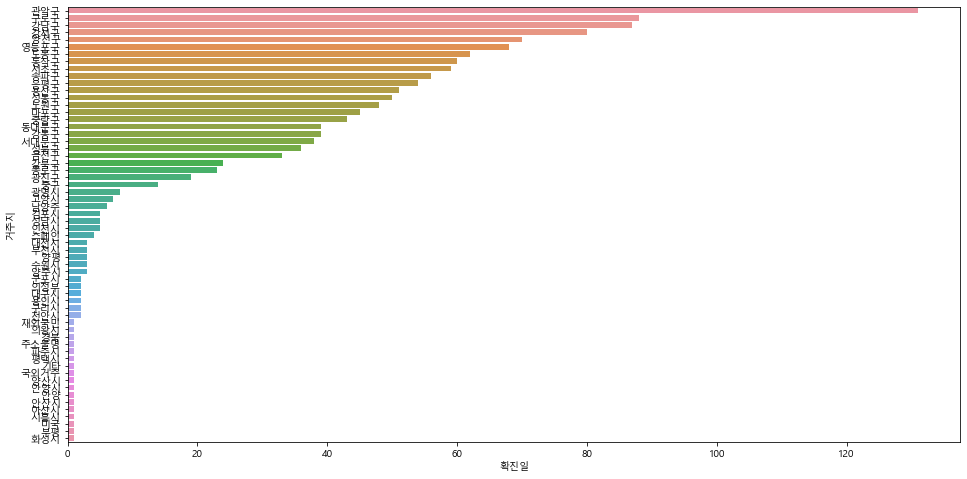

In [124]:
#5
import seaborn as sns
ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x =data_5.확진일, y=data_5.거주지,data = data_5)